# 1. Initializations

## 1.1 General imports

In [ ]:
### data management
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, probplot
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

### graphical basics
import matplotlib.pyplot as plt
%matplotlib inline

### graphical plotly basics
import plotly.graph_objects as go
import plotly.express as px
# for jupyter notebook display management
import plotly.io as pio
pio.renderers.default = "notebook"


## 1.2 General dataframe functions

In [2]:
import smartcheck.dataframe_common as dfc

# 2. Loading and Data Quality

## 2.1 Loading of data sets and general exploration

### 2.1.1 VELIB DISPO

In [3]:
df_disp_velib_raw = dfc.load_dataset_from_config('velib_dispo_data', sep=';')

if df_disp_velib_raw is not None and isinstance(df_disp_velib_raw, pd.DataFrame):
    display(df_disp_velib_raw.head())
    dfc.log_general_info(df_disp_velib_raw)
    nb_first, nb_total = dfc.detect_and_log_duplicates_and_missing(df_disp_velib_raw)
    if nb_first != nb_total:
        print(dfc.duplicates_index_map(df_disp_velib_raw))
    df_disp_velib = dfc.normalize_column_names(df_disp_velib_raw)

[INFO]-[2025-06-01 14:12:05,271] File path resolved from configuration : https://drive.google.com/file/d/1kBkBYm55NrNZ55fjD2G7jvdJqIz517Qm/view?usp=drive_link.
[INFO]-[2025-06-01 14:12:05,271] File ID extracted from URL: 1kBkBYm55NrNZ55fjD2G7jvdJqIz517Qm


,Identifiant station,Nom station,Station en fonctionnement,Capacité de la station,Nombre bornettes libres,Nombre total vélos disponibles,Vélos mécaniques disponibles,Vélos électriques disponibles,Borne de paiement disponible,Retour vélib possible,Actualisation de la donnée,Coordonnées géographiques,Nom communes équipées,Code INSEE communes équipées,station_opening_hours
0,16107,Benjamin Godard - Victor Hugo,OUI,0,27,8,0,8,OUI,OUI,2025-04-17T15:39:50+00:00,"48.865983, 2.275725",Paris,75056,NaN
1,44015,Rouget de L'isle - Watteau,OUI,0,12,8,4,4,OUI,OUI,2025-04-17T15:37:57+00:00,"48.778192750803, 2.3963020229163",Vitry-sur-Seine,94081,NaN
2,40001,Hôpital Mondor,OUI,0,23,6,2,4,OUI,OUI,2025-04-17T15:37:02+00:00,"48.798922410229, 2.4537451531298",Créteil,94028,NaN
3,9020,Toudouze - Clauzel,OUI,0,18,2,0,2,OUI,OUI,2025-04-17T15:41:24+00:00,"48.87929591733507, 2.3373600840568547",Paris,75056,NaN
4,13007,Le Brun - Gobelins,OUI,0,37,10,6,4,OUI,OUI,2025-04-17T15:38:07+00:00,"48.835092787824, 2.3534681351338",Paris,75056,NaN


[INFO]-[2025-06-01 14:12:08,536] Dataset shape: 1472 rows x 15 columns
[INFO]-[2025-06-01 14:12:08,536] For quantitative variable description use:
df.select_dtypes(include=np.number).describe()
[INFO]-[2025-06-01 14:12:08,538] For quantitative correlation matrix use:
df.select_dtypes(include=np.number).corr()
[INFO]-[2025-06-01 14:12:08,544] DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Identifiant station             1472 non-null   object 
 1   Nom station                     1472 non-null   object 
 2   Station en fonctionnement       1472 non-null   object 
 3   Capacité de la station          1472 non-null   int64  
 4   Nombre bornettes libres         1472 non-null   int64  
 5   Nombre total vélos disponibles  1472 non-null   int64  
 6   Vélos mécaniques disponibles    1472 non

#### Global Assessment

In [4]:
df_disp_velib.info()
display(df_disp_velib.head())
df_cpt_velib_desc = df_disp_velib.select_dtypes(include=np.number).describe()
display(df_cpt_velib_desc)
df_cpt_velib_cr = df_disp_velib.select_dtypes(include=np.number).corr()
display(df_cpt_velib_cr)
dfc.display_variable_info(df_disp_velib, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   identifiant_station             1472 non-null   object 
 1   nom_station                     1472 non-null   object 
 2   station_en_fonctionnement       1472 non-null   object 
 3   capacite_de_la_station          1472 non-null   int64  
 4   nombre_bornettes_libres         1472 non-null   int64  
 5   nombre_total_velos_disponibles  1472 non-null   int64  
 6   velos_mecaniques_disponibles    1472 non-null   int64  
 7   velos_electriques_disponibles   1472 non-null   int64  
 8   borne_de_paiement_disponible    1472 non-null   object 
 9   retour_velib_possible           1472 non-null   object 
 10  actualisation_de_la_donnee      1472 non-null   object 
 11  coordonnees_geographiques       1472 non-null   object 
 12  nom_communes_equipees           14

,identifiant_station,nom_station,station_en_fonctionnement,capacite_de_la_station,nombre_bornettes_libres,nombre_total_velos_disponibles,velos_mecaniques_disponibles,velos_electriques_disponibles,borne_de_paiement_disponible,retour_velib_possible,actualisation_de_la_donnee,coordonnees_geographiques,nom_communes_equipees,code_insee_communes_equipees,station_opening_hours
0,16107,Benjamin Godard - Victor Hugo,OUI,0,27,8,0,8,OUI,OUI,2025-04-17T15:39:50+00:00,"48.865983, 2.275725",Paris,75056,NaN
1,44015,Rouget de L'isle - Watteau,OUI,0,12,8,4,4,OUI,OUI,2025-04-17T15:37:57+00:00,"48.778192750803, 2.3963020229163",Vitry-sur-Seine,94081,NaN
2,40001,Hôpital Mondor,OUI,0,23,6,2,4,OUI,OUI,2025-04-17T15:37:02+00:00,"48.798922410229, 2.4537451531298",Créteil,94028,NaN
3,9020,Toudouze - Clauzel,OUI,0,18,2,0,2,OUI,OUI,2025-04-17T15:41:24+00:00,"48.87929591733507, 2.3373600840568547",Paris,75056,NaN
4,13007,Le Brun - Gobelins,OUI,0,37,10,6,4,OUI,OUI,2025-04-17T15:38:07+00:00,"48.835092787824, 2.3534681351338",Paris,75056,NaN


,capacite_de_la_station,nombre_bornettes_libres,nombre_total_velos_disponibles,velos_mecaniques_disponibles,velos_electriques_disponibles,code_insee_communes_equipees,station_opening_hours
count,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,0.0
mean,0.366848,20.063179,10.333560,6.832201,3.501359,80987.333560,NaN
std,2.312426,11.796055,10.603836,9.249600,3.296786,8415.144634,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,75056.000000,NaN
25%,0.000000,11.750000,3.000000,1.000000,1.000000,75056.000000,NaN
50%,0.000000,19.000000,7.000000,3.000000,3.000000,75056.000000,NaN
75%,0.000000,27.000000,14.000000,10.000000,5.000000,92040.000000,NaN
max,50.000000,65.000000,68.000000,63.000000,23.000000,95018.000000,NaN


,capacite_de_la_station,nombre_bornettes_libres,nombre_total_velos_disponibles,velos_mecaniques_disponibles,velos_electriques_disponibles,code_insee_communes_equipees,station_opening_hours
capacite_de_la_station,1.000000,0.047723,0.005541,-0.011645,0.050495,-0.056901,NaN
nombre_bornettes_libres,0.047723,1.000000,-0.435707,-0.407120,-0.259180,-0.082124,NaN
nombre_total_velos_disponibles,0.005541,-0.435707,1.000000,0.953942,0.539997,-0.063042,NaN
velos_mecaniques_disponibles,-0.011645,-0.407120,0.953942,1.000000,0.262633,-0.043577,NaN
velos_electriques_disponibles,0.050495,-0.259180,0.539997,0.262633,1.000000,-0.080509,NaN
code_insee_communes_equipees,-0.056901,-0.082124,-0.063042,-0.043577,-0.080509,1.000000,NaN
station_opening_hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[INFO]-[2025-06-01 14:12:08,620] Analysis for DataFrame:
[INFO]-[2025-06-01 14:12:08,621] Analysis for column [identifiant_station]:
[INFO]-[2025-06-01 14:12:08,623] Sorted unique values (first 5): ['10001', '10003', '10004', '10005', '10006']
[INFO]-[2025-06-01 14:12:08,626] Value distribution (first 5):
identifiant_station
1002     0.000679
21404    0.000679
27004    0.000679
34014    0.000679
41301    0.000679
Name: proportion, dtype: float64
[INFO]-[2025-06-01 14:12:08,627] Analysis for column [nom_station]:
[INFO]-[2025-06-01 14:12:08,629] Sorted unique values (first 5): ['11 Novembre 1918 - 8 Mai 1945', '18 juin 1940 - Buzenval', '8 Mai 1945 - 10 Juillet 1940', 'Abbeville - Faubourg Poissonnière', 'Abbé Carton - Plantes']
[INFO]-[2025-06-01 14:12:08,632] Value distribution (first 5):
nom_station
Château - République             0.001359
Regnault - Patay                 0.001359
Place de la Gare                 0.001359
Place Nelson Mandela             0.001359
Benjamin Godard - V

In [5]:
# Analyse de la distribution d'une variable spécique en relation avec celle de son dataframe
ref_col = 'station_en_fonctionnement' # ici notre variable cible
dfc.analyze_by_reference_variable(df_disp_velib, ref_col)

[INFO]-[2025-06-01 14:12:08,696] Distribution of station_en_fonctionnement:
station_en_fonctionnement
OUI    0.991168
NON    0.008832
[INFO]-[2025-06-01 14:12:08,704] Medians by station_en_fonctionnement:
                           capacite_de_la_station  nombre_bornettes_libres  nombre_total_velos_disponibles  velos_mecaniques_disponibles  velos_electriques_disponibles  code_insee_communes_equipees  station_opening_hours
station_en_fonctionnement                                                                                                                                                                                                   
NON                                           0.0                     27.0                             0.0                           0.0                            0.0                       75056.0                    NaN
OUI                                           0.0                     19.0                             7.0                          

In [6]:
# Analyse croisée de la distribution d'une variable spécifique en fonction d'autres variables (quantitatives ou qualitatives) du dataframe
ref_col = 'station_en_fonctionnement' # ici notre variable cible
cross_columns = [ref_col] + ['borne_de_paiement_disponible', 'retour_velib_possible']
dfc.log_cross_distributions(
    df_disp_velib[cross_columns], 
    ref_col
)

[INFO]-[2025-06-01 14:12:08,744] Cross-distribution of station_en_fonctionnement by borne_de_paiement_disponible:
borne_de_paiement_disponible  station_en_fonctionnement
NON                           OUI                          0.59375
                              NON                          0.40625
OUI                           OUI                          1.00000
[INFO]-[2025-06-01 14:12:08,748] Cross-distribution of station_en_fonctionnement by retour_velib_possible:
retour_velib_possible  station_en_fonctionnement
NON                    OUI                          0.59375
                       NON                          0.40625
OUI                    OUI                          1.00000


In [13]:
# Analyse croisée d'une variable en fonction d'une autre
ref_col = 'borne_de_paiement_disponible'
target_col = 'station_en_fonctionnement'
display(pd.crosstab(df_disp_velib[ref_col], df_disp_velib[target_col]))

station_en_fonctionnement,NON,OUI
borne_de_paiement_disponible,,
NON,13,19
OUI,0,1440


In [22]:
# Analyse croisée des d'une variable en fonction d'une autre (en conservant les NaN)
ref_col = 'station_opening_hours'
target_col = 'station_en_fonctionnement'
ref_cross_tab = pd.crosstab(df_disp_velib[ref_col], df_disp_velib[target_col], dropna=False, normalize=True)
display(ref_cross_tab)

# catégorisation via normalisation
ref_col_val_norm = np.where(
    df_disp_velib[ref_col].isin(ref_cross_tab[ref_cross_tab['OUI'] >= 0.8].index.tolist()), 
    1, 
    0
)
df_disp_velib[ref_col] = ref_col_val_norm
ref_cross_tab_norm = pd.crosstab(df_disp_velib[ref_col], df_disp_velib[target_col], dropna=False, normalize=True)
display(ref_cross_tab_norm)


station_en_fonctionnement,NON,OUI
station_opening_hours,,
NaN,0.008832,0.991168


station_en_fonctionnement,NON,OUI
station_opening_hours,,
1,0.008832,0.991168


In [ ]:
ref_col = 'retour_velib_possible'
target_col = 'station_en_fonctionnement'

# Génération des colonnes dummies pour ref_col
ref_col_dummies = pd.get_dummies(df_disp_velib[ref_col], prefix=ref_col)
print("Colonnes dummies générées :", list(ref_col_dummies.columns))

# Pour chaque modalité (dummy), tester son lien avec la variable cible
for col in ref_col_dummies:
    # Test du Chi-Deux
    cross_tab = pd.crosstab(df_disp_velib[target_col], ref_col_dummies[col])
    if cross_tab.shape[1] != 2:
        print(f"⚠️ Modalité [{col}] ignorée (1 seule valeur présente)")
        continue
    stat, p, _, _ = chi2_contingency(cross_tab)
    # V de Cramer
    V_Cramer = np.sqrt(
        stat/cross_tab.values.sum())
    # On affiche uniquement les variables significatives et dont le V de Cramer est supérieur à 0.1
    # Faible : Valeur autour de 0.1 ;
    # Moyenne : Valeur autour de 0.3 ;
    # Elevée : Valeur autour et supérieure à 0.5.
    # Lorsque la valeur du V de Cramer est très élevée (aux alentours de 0.8 et plus), on soupçonne généralement de la multicolinéarité.
    result = 'significative' if (p < 0.05) and (V_Cramer > 0.1) else 'NON signficative'
    print(f"Variable [{col}] {result} Vs [{target_col}]: p-value[{p:.5f}], V_Cramer[{V_Cramer:.5f}]")

Colonnes dummies générées : ['retour_velib_possible_NON', 'retour_velib_possible_OUI']
Variable [retour_velib_possible_NON] significative Vs [station_en_fonctionnement]: p-value[0.00000], V_Cramer[0.60832]
Variable [retour_velib_possible_OUI] significative Vs [station_en_fonctionnement]: p-value[0.00000], V_Cramer[0.60832]


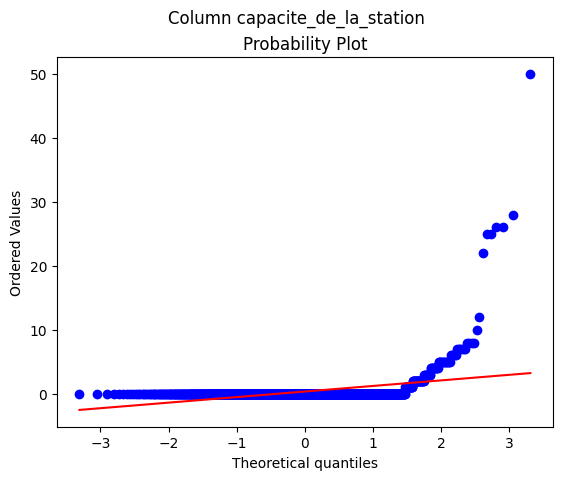

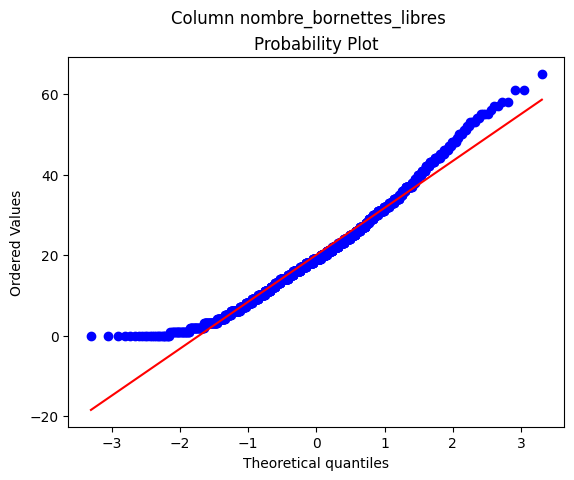

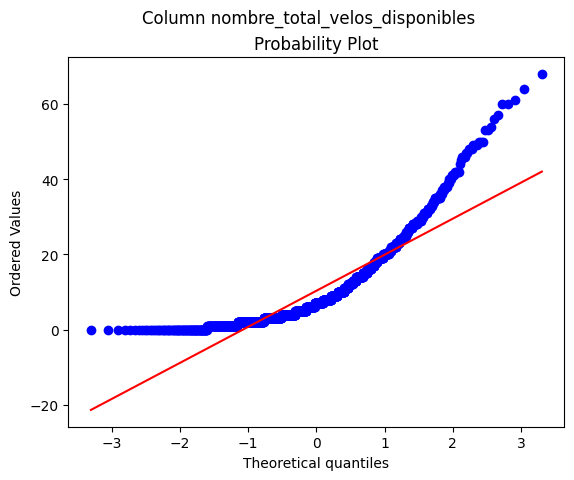

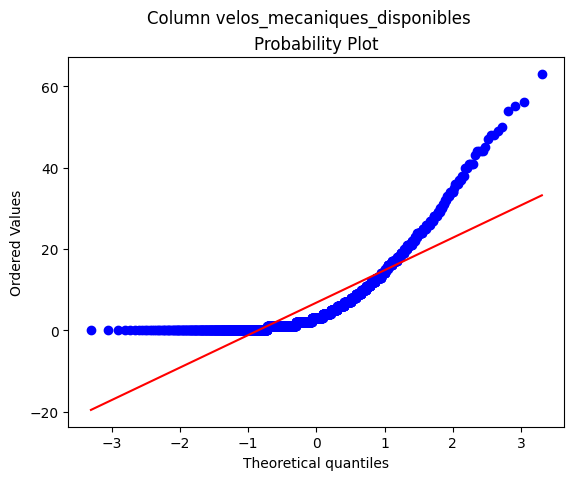

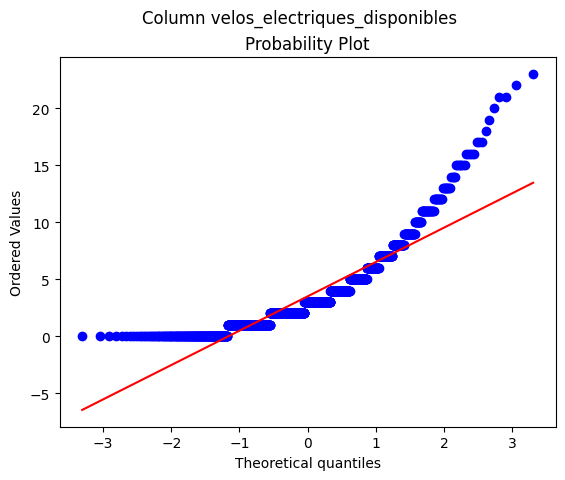

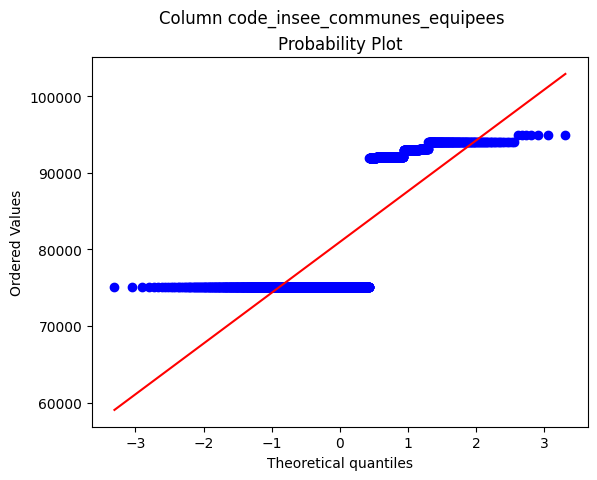

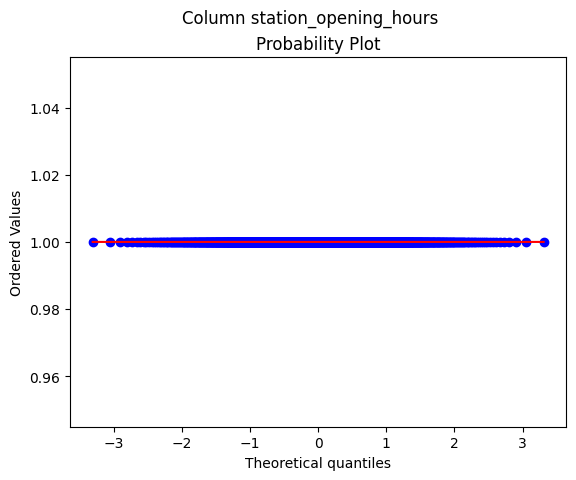

In [72]:
# Vérificationn de la répartition en loi normale de chaque données numérique
for col in df_disp_velib.select_dtypes(include='number').columns:
    probplot(df_disp_velib[col], dist="norm", plot=plt)
    plt.suptitle(f"Column {col}")
    plt.show()

### 2.1.2 VELIB COMPTAGE

In [ ]:
df_cpt_velib_raw = dfc.load_dataset_from_config('velib_comptage_data', sep=';')

if df_cpt_velib_raw is not None and isinstance(df_cpt_velib_raw, pd.DataFrame):
    display(df_cpt_velib_raw.head())
    dfc.log_general_info(df_cpt_velib_raw)
    nb_first, nb_total = dfc.detect_and_log_duplicates_and_missing(df_cpt_velib_raw)
    if nb_first != nb_total:
        print(dfc.duplicates_index_map(df_cpt_velib_raw))
    df_cpt_velib = dfc.normalize_column_names(df_cpt_velib_raw)

In [ ]:
df_cpt_velib.info()
display(df_cpt_velib.head())
df_cpt_velib_desc = df_cpt_velib.select_dtypes(include=np.number).describe()
display(df_cpt_velib_desc)
df_cpt_velib_cr = df_cpt_velib.select_dtypes(include=np.number).corr()
display(df_cpt_velib_cr)

## 2.2 Data quality refinement

### 2.2.2 VELIB COMPTAGE

In [ ]:
# Original backup and duplicates management
df_disp_velib_orig = df_disp_velib.copy()
df_disp_velib = df_disp_velib.drop_duplicates()

In [ ]:
# Exemple de modification localisée en fonction de la proximité à la médiane d'autre variables
# mask = (
#     (train['Gender'].isna()) &
#     (abs(train['Age'] - 30) > abs(train['Age'] - 41)) & # L’âge est plus proche de 41 que de 30
#     (train['Previously_Insured'] == 0) & # La personne n’était pas assurée auparavant
#     (train['Vehicle_Damage'] == 1) # Elle a subi un dommage sur son véhicule
# )
# train.loc[mask, 'Gender'] = 0

In [ ]:
# Exemple de modification par répartition spécifique entre deux valeurs 0 et 1
# proportion_tab = [0] * 55 + [1] * 45
# mask = (
#     (train['Gender'].isna()) &
# )
# train.loc[mask, 'Gender'] = train.loc[mask, 'Gender'].apply(lambda x: random.choice(proportion))

In [ ]:
mm_scaler = MinMaxScaler()
r_scaler = RobustScaler()
s_scaler = StandardScaler()

### 2.2.2 VELIB COMPTAGE

In [ ]:
# Original backup and duplicates management
df_cpt_velib_orig = df_cpt_velib.copy()
df_cpt_velib = df_cpt_velib.drop_duplicates()

## 2.3 Data combination and rework

# 2. Data Viz' and Analysis

## 2.1 General Data Viz'

## 2.2 Quantitative mono variable distribution

## 2.3 Qualitative mono variable distribution

## 2.4 Qualitative multi variable distribution

## 2.5 Quantitative multi variable correlation